In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
contract_size = 100  # Option contract size

scenario_changes = {
    "SPY": 0.03,  # +3.0%
    "IWM": 0.036, # +3.6%
    "QQQ": 0.041  # +4.1%
}

trades_df = pd.read_csv("./optimized_trades.csv")
trades_df.columns = trades_df.columns.str.strip()
trades_df = trades_df.sort_values(by="Date")
trades_df.reset_index(drop=True, inplace=True)
trades_df

,Date,Option_ID,Maturity,Buy,Sell,Ask_Price,Bid_Price,Premium_Cost,Exposure
0,4/11/2024,SPY_4/12/2024_527.0,4/12/2024,1514.0,0.0,0.03,0.02,4542.0,10000084.00
1,4/11/2024,SPY_4/12/2024_529.0,4/12/2024,13513.0,0.0,0.02,0.01,27026.0,10000084.00
2,4/11/2024,SPY_4/12/2024_531.0,4/12/2024,11319.0,0.0,0.01,0.00,11319.0,10000084.00
3,4/12/2024,SPY_4/15/2024_522.0,4/15/2024,9985.0,0.0,0.06,0.05,59910.0,10000095.50
4,4/12/2024,SPY_4/15/2024_523.0,4/15/2024,5172.0,0.0,0.05,0.04,25860.0,10000095.50
...,...,...,...,...,...,...,...,...,...
63,5/7/2024,SPY_5/8/2024_525.0,5/8/2024,4958.0,0.0,0.01,0.00,4958.0,10000013.76
64,5/8/2024,SPY_5/9/2024_525.0,5/9/2024,9338.0,0.0,0.01,0.00,9338.0,10000576.97
65,5/8/2024,SPY_5/9/2024_526.0,5/9/2024,4183.0,0.0,0.01,0.00,4183.0,10000576.97
66,5/9/2024,SPY_5/10/2024_527.5,5/10/2024,8254.0,0.0,0.01,0.00,8254.0,10000175.81


In [30]:
# group by date agg sum of premium cost, and expsoure for a given date
cost_df = trades_df.groupby("Date").agg(
    {"Premium_Cost": "sum"}
)

# Exposure is the same for all trades on a given date so need to sum and divide by num trades
exposure_df = trades_df.groupby("Date").agg(
    {"Exposure": "sum"}
)
exposure_df["Exposure"] = exposure_df["Exposure"] / trades_df.groupby("Date").size()

# Merge the two dataframes
cost_expo_df = cost_df.merge(exposure_df, on="Date")

cost_expo_df.reset_index(inplace=True)
cost_expo_df

,Date,Premium_Cost,Exposure
0,4/11/2024,42887.0,10000084.00
1,4/12/2024,143529.0,10000095.50
2,4/15/2024,195905.0,10000033.75
3,4/16/2024,116005.0,10000003.88
4,4/17/2024,110513.0,10000062.50
5,4/18/2024,112198.0,10000016.32
6,4/19/2024,151908.0,10000094.68
7,4/22/2024,36882.0,10000090.40
8,4/23/2024,42303.0,10000276.60
9,4/24/2024,29350.0,10000076.86


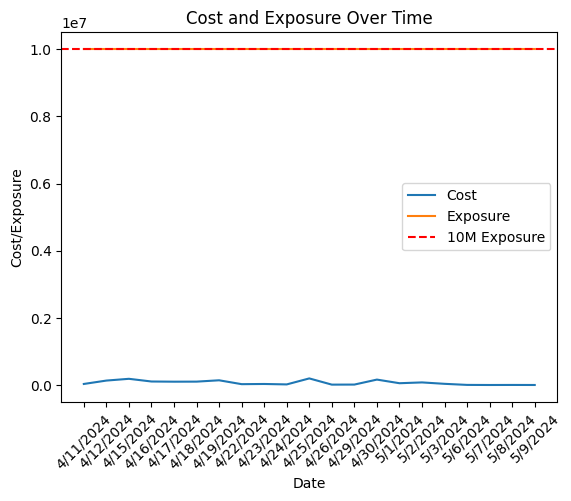

In [31]:
# plot cost and exposure over time to see how they change
fig, ax = plt.subplots()
ax.plot(cost_expo_df["Date"], cost_expo_df["Premium_Cost"], label="Cost")
ax.plot(cost_expo_df["Date"], cost_expo_df["Exposure"], label="Exposure")
ax.set_title("Cost and Exposure Over Time")
# set hline to 10million
ax.axhline(y=10000000, color='r', linestyle='--', label="10M Exposure")
ax.set_xlabel("Date")
ax.set_ylabel("Cost/Exposure")
ax.legend()
plt.xticks(rotation=45)
plt.show()

In [32]:
market_df = pd.read_csv("./data/BADSS training data.csv")
market_df.columns = market_df.columns.str.strip().str.replace(" ", "_")
market_df['Date'] = pd.to_datetime(market_df['Date'], errors='coerce')
market_df['Maturity'] = pd.to_datetime(market_df['Maturity'], errors='coerce')
# clean up white spaces
market_df.columns = market_df.columns.str.strip()

market_df

,Date,Symbol,Maturity,Strike,Bid_Price,Bid_Size,Ask_Price,Ask_Size,Undl_Price
0,2024-04-11,SPY,2024-04-12,518.0,1.74,13,1.76,592,518.00
1,2024-04-11,SPY,2024-04-12,519.0,1.24,54,1.25,1619,518.00
2,2024-04-11,SPY,2024-04-12,520.0,0.84,94,0.85,2646,518.00
3,2024-04-11,SPY,2024-04-12,521.0,0.54,479,0.55,3311,518.00
4,2024-04-11,SPY,2024-04-12,522.0,0.33,1207,0.34,3614,518.00
...,...,...,...,...,...,...,...,...,...
25433,2024-05-10,QQQ,2024-05-24,500.0,0.00,0,0.01,8615,442.06
25434,2024-05-10,QQQ,2024-05-24,505.0,0.00,0,0.01,9305,442.06
25435,2024-05-10,QQQ,2024-05-24,510.0,0.00,0,0.01,2421,442.06
25436,2024-05-10,QQQ,2024-05-24,515.0,0.00,0,0.01,5027,442.06


In [ ]:
# calculate daily exposure
